<a href="https://colab.research.google.com/github/nfrn/Tutorial_Intro_ML_2Health/blob/master/Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer Wisconsin (Diagnostic) Data Set**
Processing data from:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

We read in the data and do some basic cleanup for missing values. For the description of the fields, see :

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

Features were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. In summary:
```
 Sample code number          : Id number (not used and thus dropped)
 Clump Thickness             : 1–10
 Uniformity of Cell Size     : 1–10
 Uniformity of Cell Shape    : 1–10
 Marginal Adhesion           : 1–10
 Single Epithelial Cell Size : 1–10
 Bare Nuclei                 : 1–10
 Bland Chromatin             : 1–10
 Normal Nucleoli             : 1–10
 Mitoses                     : 1–10
 Class                       : 2 for benign, 4 for malignant
```



In [1]:
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None)
data = data.drop(data.columns[0], axis=1)
data.head(10)

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


###**Data Cleaning and Preprocessing**

In [2]:
df = pd.DataFrame(data)
# Notice that in column 6 there are some missing values.
print(df.loc[df[6] == "?"].head(5))

# We calculate the mean of that feature.
df_6_without_missing_values = df[6].loc[df[6] != "?"]
mean = df_6_without_missing_values.astype(int).mean()
print("Mean value: " + str(mean))

# Replace missing values with mean value
df[6] = df[6].replace("?", mean)
df[6] = df[6].astype(int)

# Re-arranging labels 2 -> 0 and 4 -> 1
df[10] = df[10].replace(2,0).replace(4,1)

     1   2   3   4   5  6   7   8   9   10
23    8   4   5   1   2  ?   7   3   1   4
40    6   6   6   9   6  ?   7   8   1   2
139   1   1   1   1   1  ?   2   1   1   2
145   1   1   3   1   2  ?   2   1   1   2
158   1   1   2   1   3  ?   1   1   1   2
Mean value: 3.5446559297218156


###**Exploratory Data Analysis (EDA)**

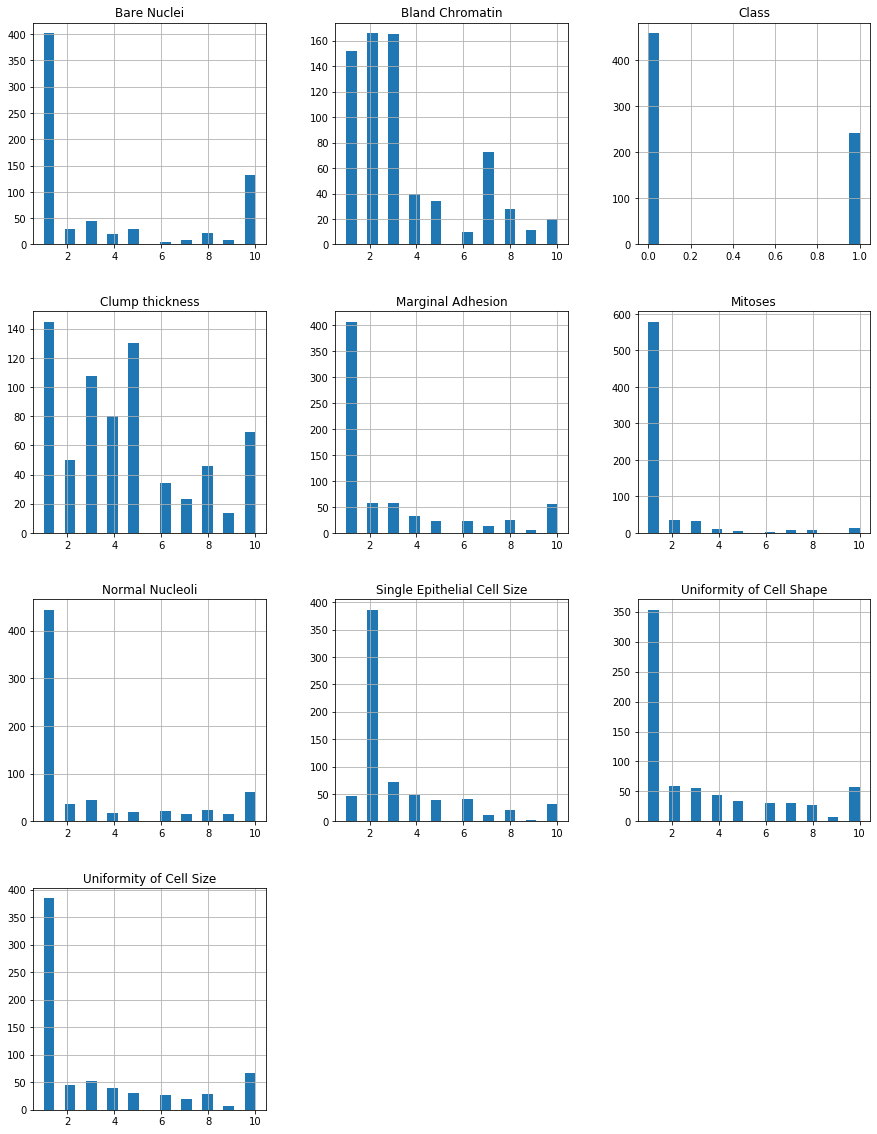

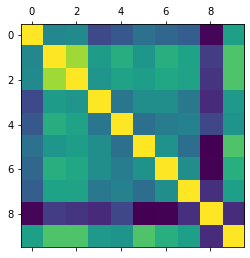

In [58]:
names = [ "ID", "Clump thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class" ]
df.columns = names[1:]
hists = df.hist(bins=20, figsize=(15,20))
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


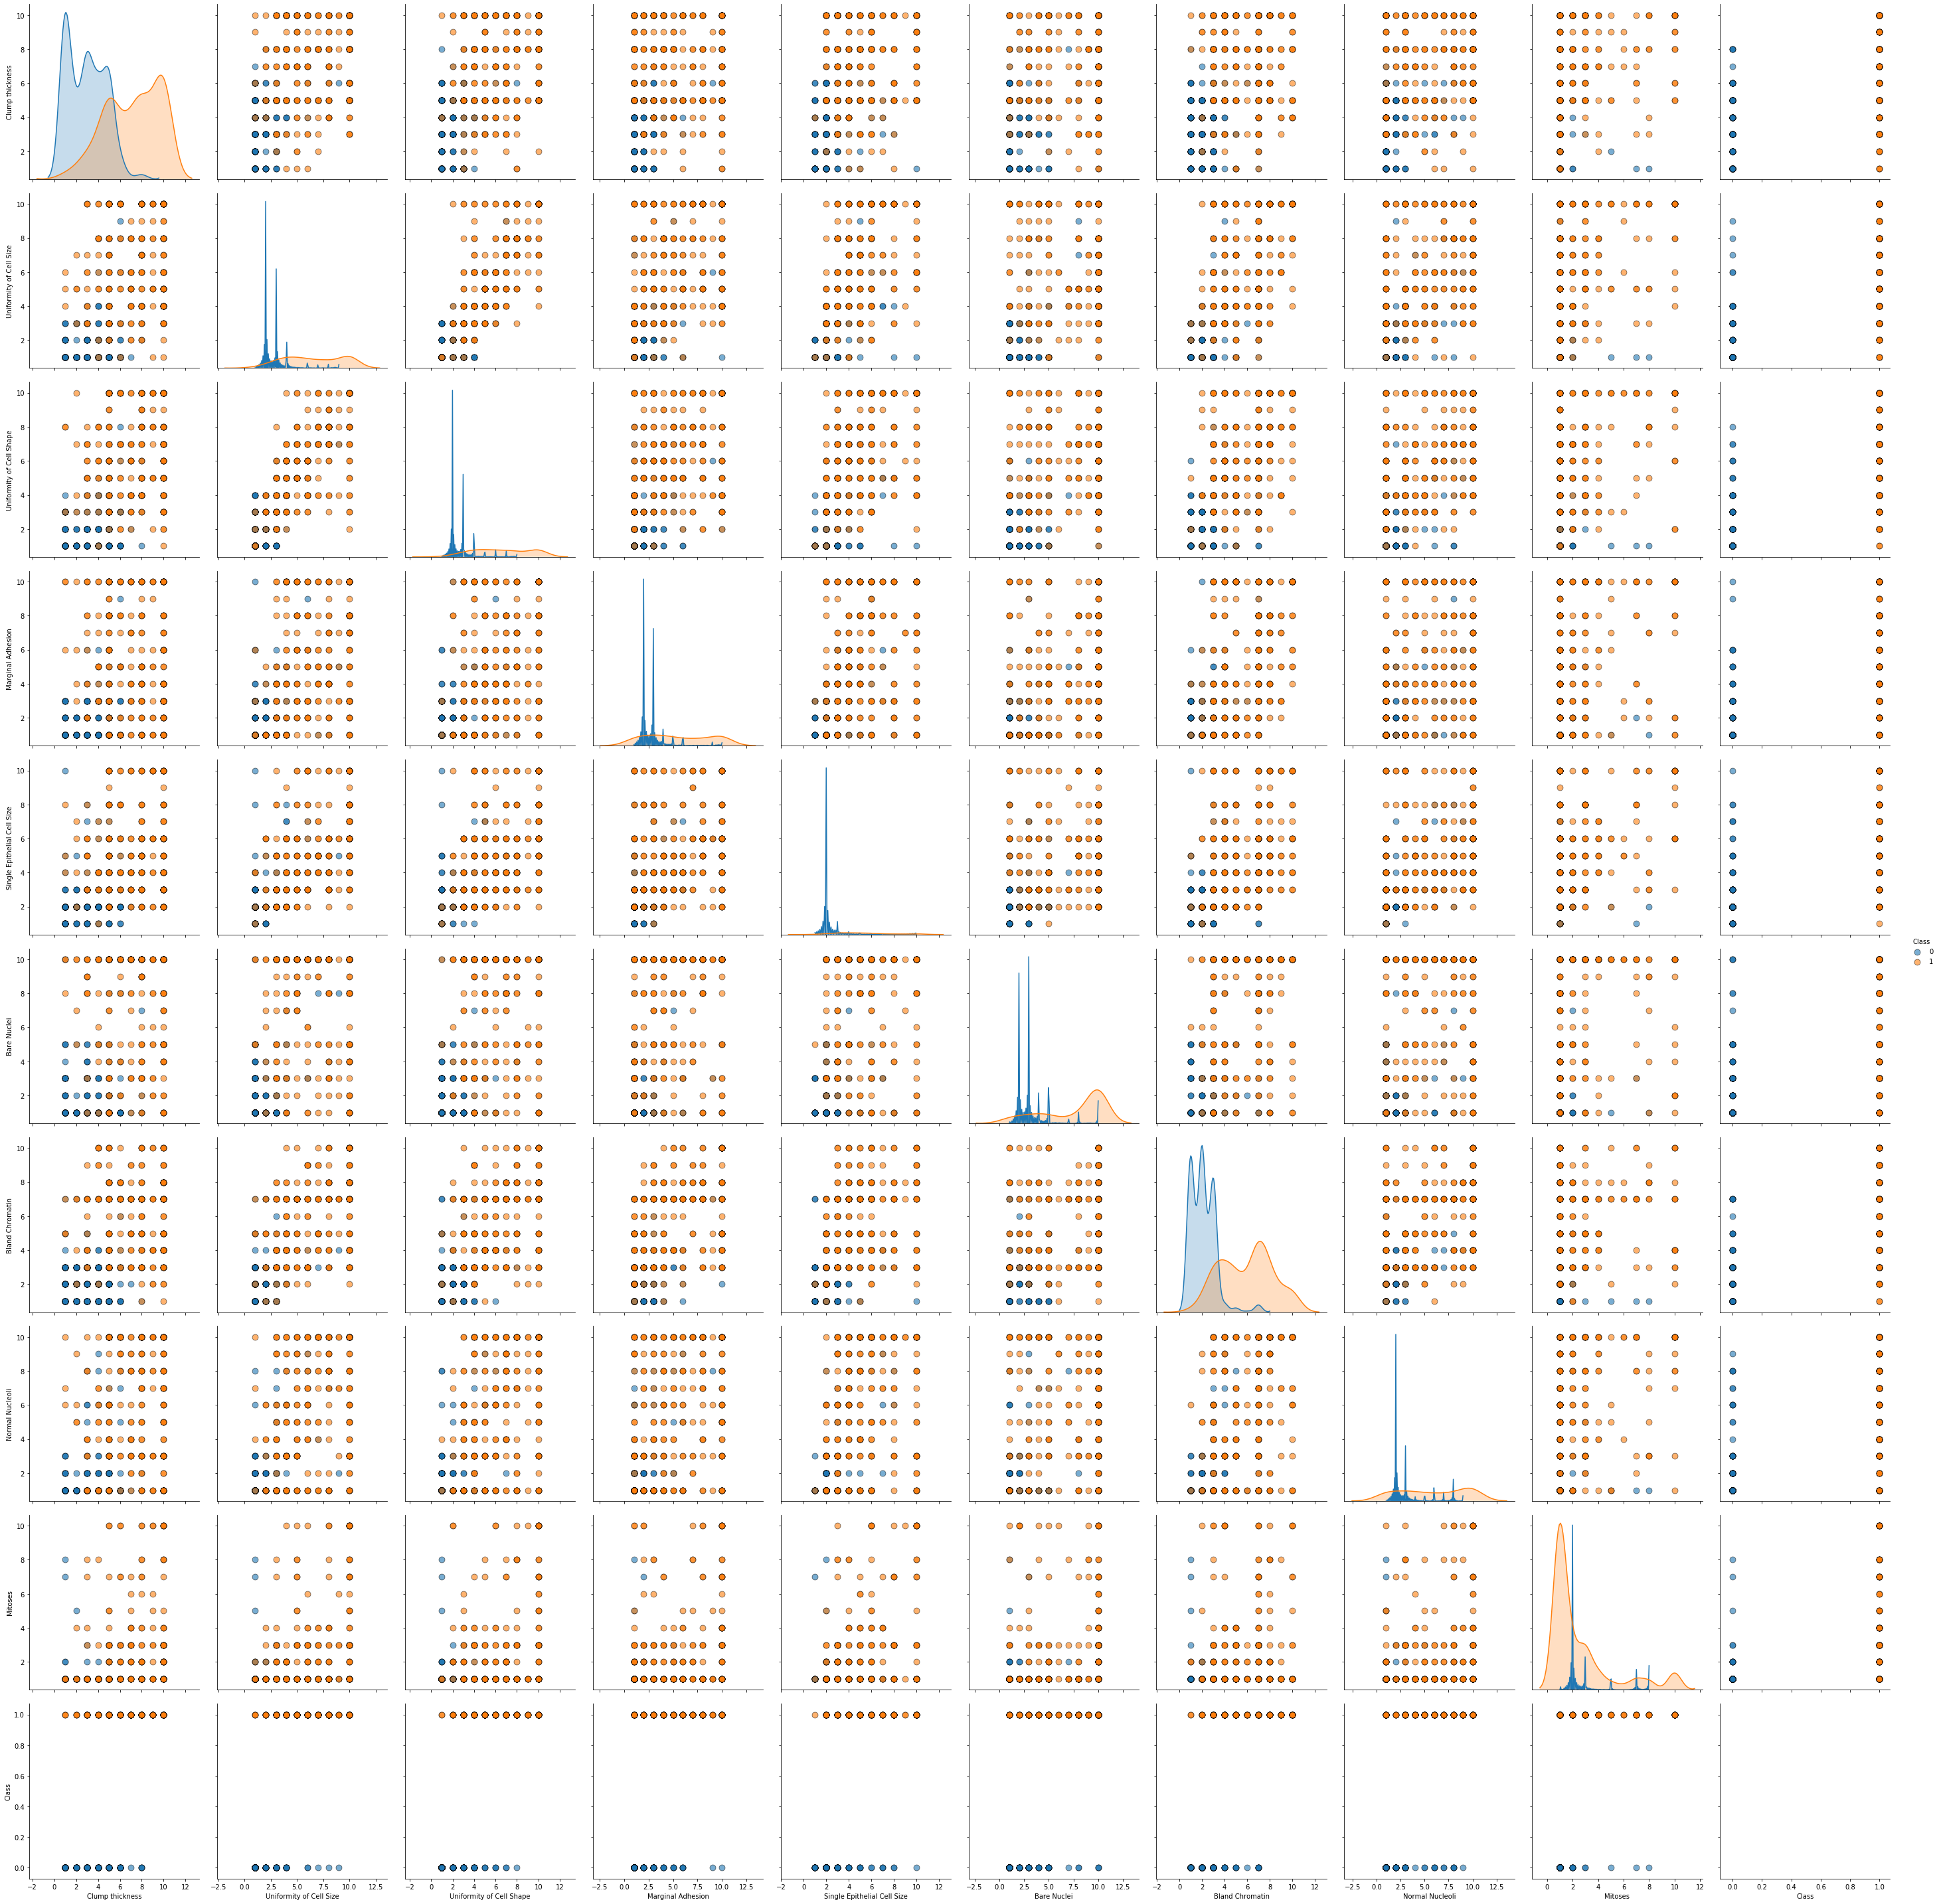

In [61]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df, hue = 'Class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


# The diagonal diagrams describe
# The other diagrams describe the relationship (or lack thereof) between two variable

In [3]:
# Using information from all columns (0-9) to predict target (column 10)
X = df.iloc[:, :9]
Y = df.iloc[:, 9]

# Splitting between traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Checking the shapes to get an understanding of the problem
print( X_train.shape, X_test.shape )
print( Y_train.shape, Y_test.shape )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(559, 9) (140, 9)
(559,) (140,)


In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow.compat.v1 as tf



#!pip install keras_tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras_tqdm import TQDMNotebookCallback

model = Sequential()
model.add(Dense(16, input_dim=(9), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, Y_train,batch_size=16,validation_split=0.2, epochs=100,verbose=0,callbacks=[TQDMNotebookCallback(leave_inner=True)])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

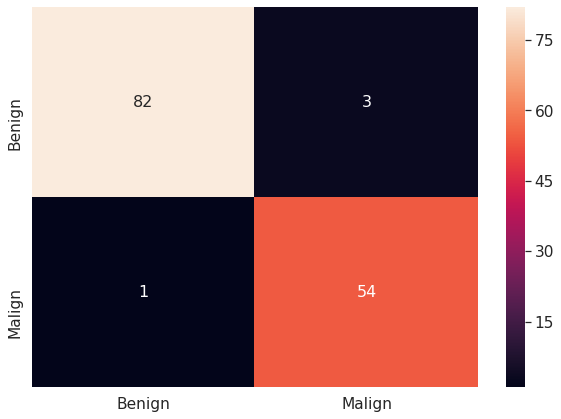

In [6]:
import seaborn as sns
#! pip install matplotlib==3.1.0
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=0)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()
#print(cm)